Student ID: 710045498

Importing the Data + Libraries


In [194]:
import pandas as pd

import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

df_train_4k = pd.read_csv('./mailing_train_4k.csv')

df_test_1k = pd.read_csv('./mailing_test_1k.csv')

1. Fit a Random Forest model

Provide a quick look at the distribution of class for the training data and test data.

In [195]:
print('Class Distribution - Training Data:\n', df_train_4k['class'].value_counts())

print('Class Distribution - Testing Data:\n', df_test_1k['class'].value_counts())

Class Distribution - Training Data:
 1    2000
0    2000
Name: class, dtype: int64
Class Distribution - Testing Data:
 0    947
1     53
Name: class, dtype: int64


Comparing the distribution of the outcome variable in training and test, do they look balanced?

The training dataset is well-balanced, but the test dataset is unbalanced.

Fit a random forest model to predict class

In [196]:
forest_model = RandomForestClassifier(random_state=0, oob_score = True, n_estimators = 1000)

train_x = df_train_4k.drop('class', axis=1)

train_y = df_train_4k['class']

forest_model.fit(train_x, train_y)

test_x = df_test_1k.drop('class', axis=1)

test_y = df_test_1k['class']

pred_y = forest_model.predict(test_x)

train_y_scores = forest_model.predict_proba(train_x)[:, 1]

Examine the results

In [197]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72       947
           1       0.08      0.64      0.14        53

    accuracy                           0.58      1000
   macro avg       0.52      0.61      0.43      1000
weighted avg       0.92      0.58      0.69      1000



What is the out-of-box error rate?

In [198]:
print('Out-of-Box Error is {:.0%}'.format(1 - forest_model.oob_score_))

Out-of-Box Error is 43%


The Out-of-Box Error is 43%

2. Compute and Compare Predictive Performance

Create a confusion matrix to show several metrics of predictive performance

In [200]:
print(confusion_matrix(test_y, pred_y))

[[544 403]
 [ 19  34]]



How would you describe the performance of this model?

In [201]:
print('Accuracy Score is {:.0%}'.format(accuracy_score(test_y, pred_y)))

Accuracy Score is 58%


The accuracy of the model is 58%, which is quite low. The model is slightly better at identifying true donations than identifying true non-donations.

Now create a ROC plot and compute the AUC for the training set

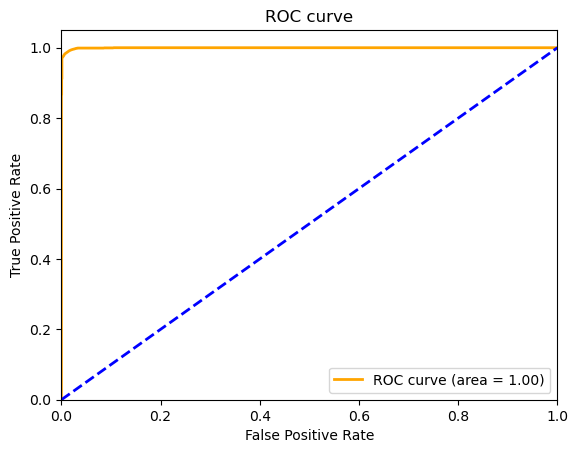

In [202]:
fpr, tpr, thresholds = roc_curve(train_y, train_y_scores)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.legend(loc="lower right")

plt.show()


Now create a ROC plot for the test set and compute the test AUC

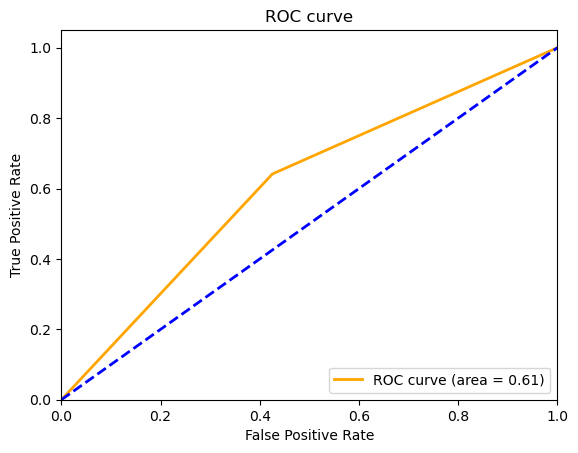

In [203]:
fpr, tpr, thresholds = roc_curve(test_y, pred_y)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.legend(loc="lower right")

plt.show()

Is the model underfit, overfit, or correctly fit to the data?

The model is overfit to the training data. An AUC of 0.61 means that the model is not good at predicting unseen data.

3. Examine the model

Examine the variable importance of the model


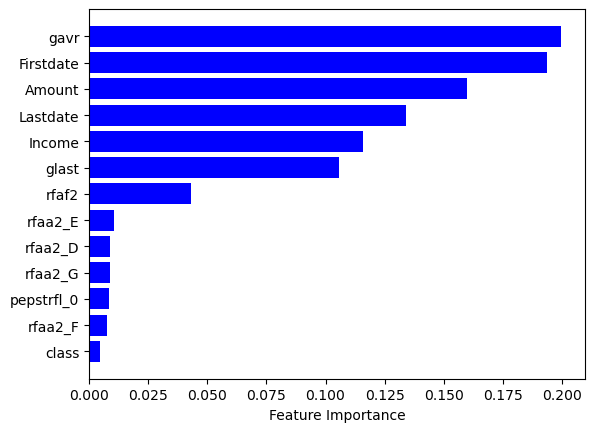

In [204]:
importances = forest_model.feature_importances_

feature_names = df_train_4k.columns

sorted_idx = importances.argsort()

plt.barh(range(len(sorted_idx)), importances[sorted_idx], color = 'blue')

plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])

plt.xlabel('Feature Importance')

plt.show()


Make some individual predictions of the model. Choose one case from the data and see what the model predicts for that one person.

In [205]:
individual_data = df_test_1k.loc[83].drop('class')

individual_data = individual_data.values.reshape(1, -1)

individual_prediction = forest_model.predict_proba(individual_data)

class_labels = forest_model.classes_

class_probabilities = zip(class_labels, individual_prediction[0])

for label, probability in class_probabilities:
    print(f"The model predicts that the probability of {label} is {probability}")


The model predicts that the probability of 0 is 0.714
The model predicts that the probability of 1 is 0.286


/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


For this individual, the model predicts that they have a 28.6% chance of donating.

Using the most important variable from the plot above, change the value of that variable to something new and make a new predicting for that one case (i.e. set the value to something very small, or very large). How does the prediction change?

In [206]:
individual_data = df_test_1k.loc[83].drop('class')

new_value = 100

individual_data['gavr'] = new_value

individual_data = individual_data.values.reshape(1, -1)

individual_prediction = forest_model.predict_proba(individual_data)

class_labels = forest_model.classes_

class_probabilities = zip(class_labels, individual_prediction[0])

for label, probability in class_probabilities:
    print(f"The model predicts that the probability of {label} is {probability}")


The model predicts that the probability of 0 is 0.5893333333333334
The model predicts that the probability of 1 is 0.4106666666666667


/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Changing the 'gavr' variable to 100 caused the model to predict that this individual is more likely to donate, 41% instead of 28.6%.

Let’s now try and predict the outcome for this case if that important variable was changed from it’s minimum value to it’s maximum value.

1. Create a grid of at least 100 points from the minimum value to the maximum value.
2. Duplicate the case you used above the same number of times
3. Add the grid of points to the data
4. Predict the outcome using this new fake data and save the predicted probability in the dataset.

Plot the results of that sequential grid against the predicted probability.

/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature nam

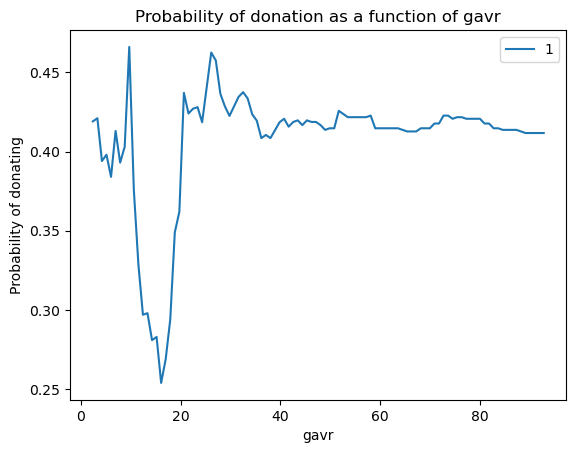

In [207]:
interval = (df_test_1k['gavr'].max() - df_test_1k['gavr'].min()) / 99

values = []

for i in range(100):
    value = df_test_1k['gavr'].min() + i * interval
    values.append(value)

probabilities_array = np.empty((0, len(forest_model.classes_)))

for value in values:

    individual_data = df_test_1k.loc[83].drop('class')
    
    individual_data['gavr'] = value
    
    individual_data = individual_data.values.reshape(1, -1)
    
    individual_prediction = forest_model.predict_proba(individual_data)
    
    probabilities_array = np.vstack([probabilities_array, individual_prediction])

plt.plot(values, probabilities_array[:, 1], label=forest_model.classes_[1])

plt.xlabel('gavr')

plt.ylabel('Probability of donating')

plt.title('Probability of donation as a function of gavr')

plt.legend()

plt.show()



4. Summarize

What are your thoughts on the impact of these different features on the likelihood for a person to respond to our donation requests?

The graph above shows that the probability of donating significantly decreases as 'gavr' increases, until 'gavr' reaches around 20 when it then increases significantly again, levelling out at around 30. 

It is worth looking at other features with a high importance to see if they have a clearer impact on the probability of donating. The code below shows the probability of donating for the same individual as above as income category changes. It is clear that as income increases, the likelihood of donating is higher. 

This insight may be more useful to the organisation as features such as 'gavr' are only applicable to previous donators.

If they want to expand their mail campaign to more people, then they will not have that data. However, they may be able to source the data for the income of other people. They could then choose to only mail people with a high income as they are more likely to donate.

/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/morganfry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature nam

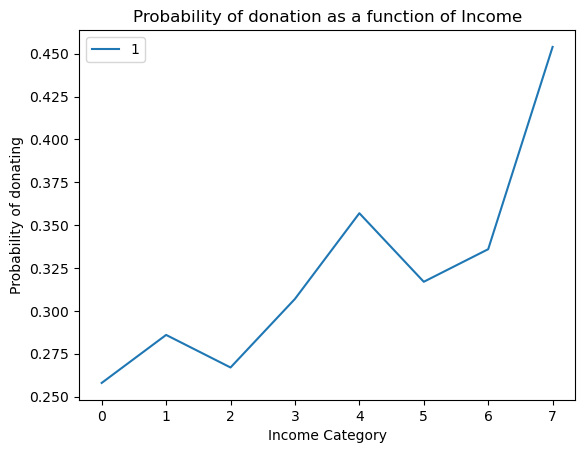

In [209]:
values = np.sort(df_test_1k['Income'].unique())

probabilities_array = np.empty((0, len(forest_model.classes_)))

for value in values:

    individual_data = df_test_1k.loc[83].drop('class')
    
    individual_data['Income'] = value
    
    individual_data = individual_data.values.reshape(1, -1)
    
    individual_prediction = forest_model.predict_proba(individual_data)
    
    probabilities_array = np.vstack([probabilities_array, individual_prediction])

plt.plot(values, probabilities_array[:, 1], label=forest_model.classes_[1])

plt.xlabel('Income Category')

plt.ylabel('Probability of donating')

plt.title('Probability of donation as a function of Income')

plt.legend()

plt.show()